In [38]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd

In [5]:
# # Flip Flop
problem_ffp = mh.FlipFlopGenerator().generate(seed=0, size=28)
#state = problem_ffp.get_state()

In [6]:
# GAB runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GABRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[16, 18],
              mutation_rates=[0.1, 0.2]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [44]:
df_run_curves_ffp.shape

(175, 7)

In [45]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000724,17.0,0.0,16,0.1,2048
1,1,0.019398,22.0,2.0,16,0.1,2048
2,2,0.029930,22.0,3.0,16,0.1,2048
3,3,0.037535,22.0,4.0,16,0.1,2048
4,4,0.041149,22.0,5.0,16,0.1,2048


In [46]:
df_run_curves_ffp['Fitness'].max()

27.0

In [47]:
# need to check Time and FEvals

In [48]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [49]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [50]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
38,38,0.139257,27.0,44.0,16,0.1,2048
67,28,0.115718,27.0,34.0,16,0.2,2048
143,75,0.046735,27.0,81.0,18,0.1,2048
174,30,0.119013,27.0,36.0,18,0.2,2048


In [51]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,16,0.1,44.0,38.0,0.139257
1,16,0.2,34.0,28.0,0.115718
2,18,0.1,81.0,75.0,0.046735
3,18,0.2,36.0,30.0,0.119013


In [52]:
# tentatively, pick pop size = 16 and mutation_rate = 0.2, with smallest FEvals, iterations and OKay time

In [53]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000724,17.0,0.0,16,0.1,2048
1,1,0.019398,22.0,2.0,16,0.1,2048
2,2,0.029930,22.0,3.0,16,0.1,2048
3,3,0.037535,22.0,4.0,16,0.1,2048
4,4,0.041149,22.0,5.0,16,0.1,2048


In [7]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [8]:
# GAB runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GABRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[16], # 20 bits in total
              mutation_rates=[0.2])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    #df_iter_curves_ffp = df_iter_curves_ffp.append(df_run_curves_ffp_sub)
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [57]:
df_iter_curves_ffp.shape

(582, 7)

In [58]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000479,17.0,0.0,16,0.2,2048
1,1,0.008285,22.0,2.0,16,0.2,2048
2,2,0.015334,22.0,3.0,16,0.2,2048
3,3,0.019451,22.0,4.0,16,0.2,2048
4,4,0.025646,22.0,5.0,16,0.2,2048


In [59]:
df_iter_curves_ffp.Iteration.max()

92

In [60]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [61]:
df_fitness_iter_ffp.shape

(93, 3)

In [62]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,14.0,5.333333
1,1,18.1,3.433333
2,2,18.7,3.344444
3,3,19.3,2.233333
4,4,19.6,2.044444


In [63]:
df_iter_curves_ffp.Fitness.max()

27.0

In [64]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

28    28
62    62
61    61
92    92
67    67
34    34
55    55
68    68
49    49
56    56
Name: Iteration, dtype: int64

In [65]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

92

In [66]:
df_fitness_iter_ffp.avg_fitness.max()

27.0

In [67]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [68]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,14.0,5.333333,2.309401
1,1,18.1,3.433333,1.852926
2,2,18.7,3.344444,1.828782
3,3,19.3,2.233333,1.494434
4,4,19.6,2.044444,1.429841


In [69]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= 26]['Iteration'].min()

62

Text(0, 0.5, 'Fitness')

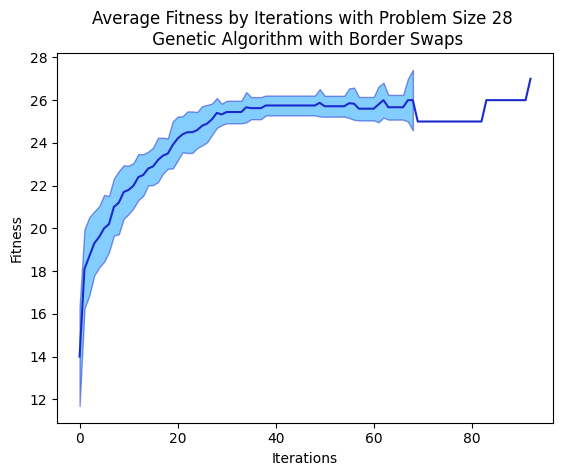

In [70]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Average Fitness by Iterations with Problem Size 28 \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [71]:
# Fevals - iteration

In [12]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [73]:
df_FEvals_iter_ffp.shape

(93, 3)

In [74]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.8,0.177778
2,2,3.2,0.400000
3,3,4.6,0.488889
4,4,5.9,0.988889


In [13]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [76]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 2.516611478423583)

In [77]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.8,0.177778,0.421637
2,2,3.2,0.400000,0.632456
3,3,4.6,0.488889,0.699206
4,4,5.9,0.988889,0.994429


Text(0, 0.5, 'FEvals')

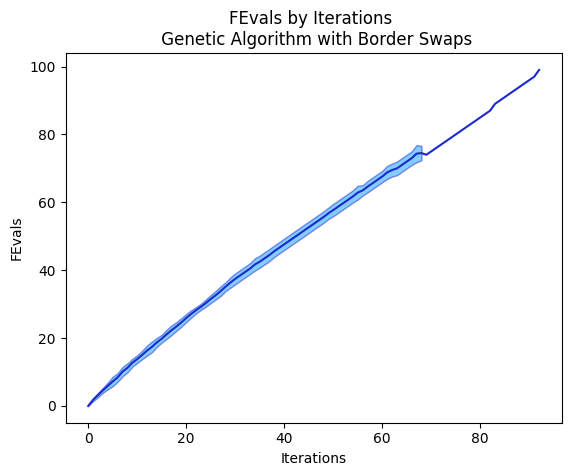

In [14]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [89]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.Iteration == 80]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
80,80,85.0,NaN,NaN


In [88]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == 0]['Iteration']

0    0
Name: Iteration, dtype: int64

In [79]:
# fitness - wall clock time

In [9]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [81]:
df_time_iter_ffp.shape

(93, 3)

In [82]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000516,8.937080e-08
1,1,0.008658,3.822274e-06
2,2,0.015322,7.124385e-06
3,3,0.021428,2.000550e-05
4,4,0.024282,2.550535e-05


In [10]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [84]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000516,8.937080e-08,0.000299
1,1,0.008658,3.822274e-06,0.001955
2,2,0.015322,7.124385e-06,0.002669
3,3,0.021428,2.000550e-05,0.004473
4,4,0.024282,2.550535e-05,0.005050


In [26]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 92]

,Iteration,avg_time,var_time,stddev_time
92,92,0.670991,NaN,NaN


In [28]:
df_time_iter_ffp[df_time_iter_ffp.Iteration == 62]

,Iteration,avg_time,var_time,stddev_time
62,62,0.371258,0.007811,0.088379


In [19]:
df_time_iter_ffp.stddev_time.max()

0.11043243272712201

Text(0, 0.5, 'Time')

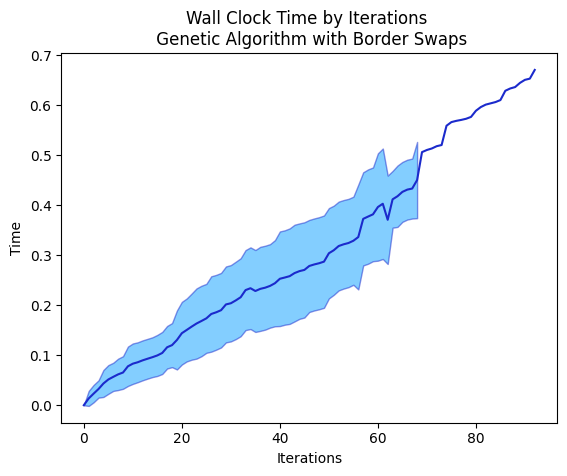

In [15]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [86]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time==df_time_iter_ffp.stddev_time.max()].Iteration

68    68
Name: Iteration, dtype: int64

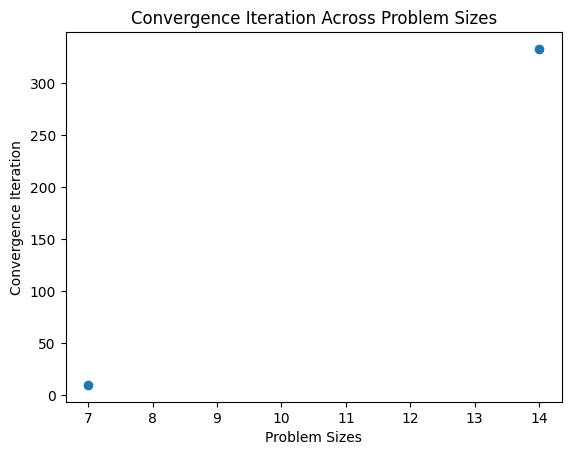

In [162]:
# scatter plot of convergent points across problem sizes
plt.scatter([7, 14], [10, 333])
plt.title('Convergence Iteration Across Problem Sizes')
plt.xlabel('Problem Sizes')
plt.ylabel('Convergence Iteration')
plt.show()